# Author : Rutuja Dindore
## Task 1 : Prediction using Supervised Machine Learning
### GRIP @ The Sparks Foundation 
#gripdecember22

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

### Importing Required Libraries: Sklearn, Numpy Array, Pandas, Matplotlib,Seaborn

In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import wget
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

## Step no. 1- Importing Dataset from remote URL

In [50]:
url='http://bit.ly/w-data'
wget.download(url)
print("Data import successful")

100% [..................................................................................] 212 / 212Data import successful


In [51]:
df=pd.read_csv('w-data')

In [52]:
#lets check the head of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
#checking the shape of the data 
df.shape 

(25, 2)

In [54]:
#lets check do we have any null value in data
df.isnull().sum().any()


False

As we can the output is False so we can conclude that there is no null value in our dataset and we can proceed the further analysis

# Step 2 - Input data Visualization

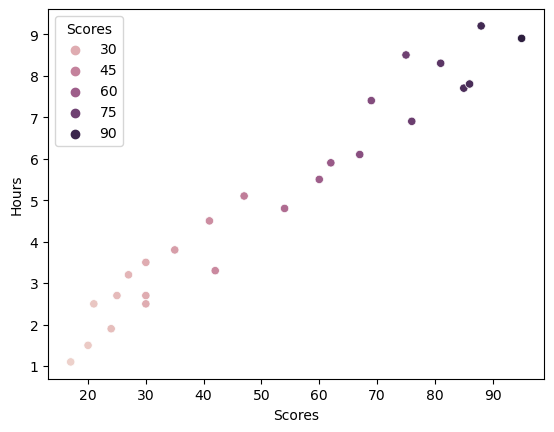

In [55]:
#let's check the relationship between hours and scores 
sns.scatterplot(x='Scores',y='Hours',data=df,hue='Scores')
plt.show()

As we can see there is a positive relation between our input variable and target variable

## Step 3 - Data Preprocessing

In [56]:
df_Input=df.drop(['Scores'],axis=1).values
df_Target=df.Scores.values

## Step 4 - Model Training

In [70]:
#we going to split the data 
x_train,x_test,y_train,y_test=train_test_split(df_Input,df_Target,test_size=.20,random_state=0)


In [58]:
#creating the linear regression object 
lr=linear_model.LinearRegression()

In [69]:
lr.fit(x_train,y_train)
print("Training complete.")

Training complete.


In [60]:
lr.coef_

array([9.91065648])

In [61]:
lr.intercept_

2.018160041434683

# Step 5 - Plotting the Line of regression

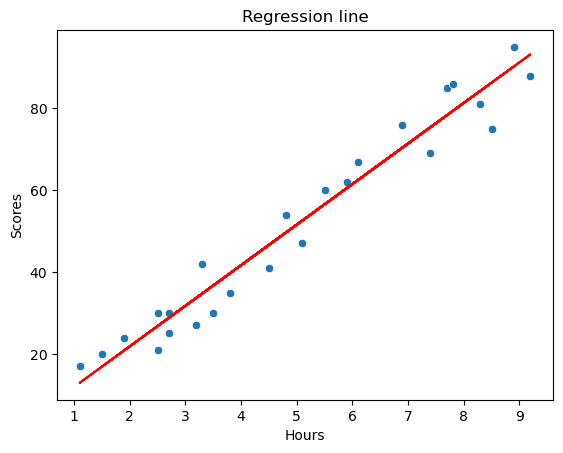

In [62]:
line = lr.coef_*df_Input+lr.intercept_
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Regression line')
plt.plot(df_Input, line,c='r');
plt.show()

# Step 6 - Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [63]:
y_predict=lr.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# What will be predicted score if a student studies for 9.25hrs/day?

In [68]:
X_new=pd.DataFrame({'Hours':[9.25]})
predicted_score=lr.predict(X_new)
print(f'Predicted Score : {predicted_score}')

Predicted Score : [93.69173249]


Comparing Actual result to the Predicted Model result 

In [65]:
Difference=pd.DataFrame({'Actual': y_test,'Predicted':y_predict})
Differenceimport warnings
warnings.filterwarnings("ignore")

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model

Checking the error rate of our model which help us to undestand how accurate our model is 

In [66]:
 print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
